In [15]:
import pandas as pd
import keras
import os
import tensorflow as tf

## load the data from csv we get before in the stage preprocess the data

1. read csv 
2. split out the target and the class name
3. drop the data we don't need in training model

### return data, target, class name , original data from csv

In [16]:
def load_data_from_csv(csv_path: str):
    ori_dataframe = pd.read_csv(csv_path)
    dataframe = ori_dataframe.copy()
    
    
    class_no = dataframe["class_no"] # get the labeled data of each posture data (1 dimension of int)
    class_name = dataframe["class_name"]# get the labeled data of each posture data (1 dimension of string)
    dataframe.drop(columns=['file_name',"class_no","class_name"], inplace=True) # drop the useles data for training
    
    
    x = dataframe
    y = keras.utils.to_categorical(class_no)
    class_name = class_name.unique()
    
    return x,y,class_name,ori_dataframe

In [17]:
x_train,y_train,class_names,_ = load_data_from_csv(r"C:\Users\User\Desktop\sophomore_2nd_semester\Artificial Intelligence\final_project\Human-pose-estimation\code\train_model\test_data.csv")


In [18]:
x_train

,nose_x,nose_y,nose_score,left_eye_x,left_eye_y,left_eye_score,right_eye_x,right_eye_y,right_eye_score,left_ear_x,...,left_knee_score,right_knee_x,right_knee_y,right_knee_score,left_ankle_x,left_ankle_y,left_ankle_score,right_ankle_x,right_ankle_y,right_ankle_score
0,100.775160,149.454040,0.480813,95.956370,154.65329,0.666816,96.203270,144.969790,0.448191,98.673860,...,0.596673,242.13371,137.97192,0.518701,286.35980,156.75510,0.610763,283.07806,142.11703,0.707876
1,103.169910,149.453690,0.428444,98.161835,154.68036,0.513664,97.839020,145.084090,0.504177,100.808426,...,0.664031,243.47098,137.70357,0.628864,287.66486,157.65848,0.680540,283.10953,142.10999,0.661836
2,105.639570,148.838580,0.608494,100.506270,154.13074,0.689602,100.341896,144.943280,0.522742,102.821945,...,0.662215,244.63695,136.83643,0.672477,287.19135,158.66809,0.582782,283.46027,143.69876,0.725402
3,107.129750,149.385220,0.397259,102.311030,154.77415,0.433730,102.063300,145.380160,0.395607,103.883090,...,0.634880,244.72357,136.90100,0.703331,288.06200,158.89029,0.573991,283.10815,143.68346,0.703281
4,109.257750,148.598650,0.579392,104.186270,153.99712,0.567397,104.299220,144.706970,0.500572,105.545560,...,0.562615,246.84427,136.61108,0.508201,287.79517,158.47680,0.543610,282.10730,143.59535,0.680152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,127.132590,110.495316,0.390198,122.373924,110.06452,0.459560,122.990880,106.740616,0.555054,113.694855,...,0.331131,142.75966,242.76428,0.608615,255.66830,194.67828,0.812623,141.85245,277.16110,0.611812
491,126.119680,111.861210,0.331054,120.946300,110.98769,0.363766,122.369804,108.186920,0.517856,112.847786,...,0.383544,146.51547,240.35143,0.401162,257.41614,193.73695,0.776922,146.11885,278.01233,0.489120
492,125.664566,111.210560,0.322301,120.563194,109.41520,0.492237,122.236690,107.682230,0.470564,111.523850,...,0.423628,150.84668,237.66911,0.375635,258.84490,192.61813,0.651550,155.59239,279.29750,0.475286
493,122.229230,109.981710,0.371271,116.752070,109.16869,0.412598,118.297130,106.068560,0.576820,108.751600,...,0.564366,156.08894,237.87396,0.333711,258.93237,192.32648,0.715681,163.44023,279.30786,0.538141


In [19]:
x_test,y_test,_,test_dataframe= load_data_from_csv(r"C:\Users\User\Desktop\sophomore_2nd_semester\Artificial Intelligence\final_project\Human-pose-estimation\code\train_model\test_data.csv")

In [20]:
from data import BodyPart
from movenet import Movenet

In [21]:

def get_center_point(landmarks, left_bodypart, right_bodypart):
    """Calculates the center point of the two given landmarks."""

    left = tf.gather(landmarks, left_bodypart.value, axis=1)
    right = tf.gather(landmarks, right_bodypart.value, axis=1)
    #get landmarks[left_bodypart.value]
    center = (left+right)/2
    return center
  
def get_pose_size(landmarks, torso_size_multiplier=2.5):
  """Calculates pose size.

  It is the maximum of two values:
    * Torso size multiplied by `torso_size_multiplier`
    * Maximum distance from pose center to any pose landmark
  """
  # Hips center
  hips_center = get_center_point(landmarks, 
                                 BodyPart.LEFT_HIP, 
                                 BodyPart.RIGHT_HIP)

  # Shoulders center
  shoulders_center = get_center_point(landmarks, 
                                      BodyPart.LEFT_SHOULDER, 
                                      BodyPart.RIGHT_SHOULDER)

  # we defined the torso size as the length of shouder to hip
  torso_size = tf.linalg.norm(shoulders_center - hips_center)

  # when we got the center point we expand the dimension of center point
  pose_center_new = get_center_point(landmarks, 
                                     BodyPart.LEFT_HIP, 
                                     BodyPart.RIGHT_HIP)
  # when we got the center point we expand the dimension of center point 
  pose_center_new = tf.expand_dims(pose_center_new, axis=1)
  
  #and braodcast to the size of the landmarks
  pose_center_new = tf.broadcast_to(pose_center_new,
                                    [tf.size(landmarks) // (17*2), 17, 2])

  # we get the 0-index of Dist to pose center
  d = tf.gather(landmarks - pose_center_new, 0, axis=0,
                name="dist_to_pose_center")
  
  # Max dist to pose center
  max_dist = tf.reduce_max(tf.linalg.norm(d, axis=0))

  # Normalize scale
  pose_size = tf.maximum(torso_size * torso_size_multiplier, max_dist)

  return pose_size


def normalize_pose_landmarks(landmarks):
  """Normalizes the landmarks translation by moving the pose center to (0,0) and
  scaling it to a constant pose size.
  """
  
  #we defined the center of posture is the middle of hip
  pose_center = get_center_point(landmarks, 
                                 BodyPart.LEFT_HIP, 
                                 BodyPart.RIGHT_HIP)
  # when we got the center point we expand the dimension of center point 
  pose_center = tf.expand_dims(pose_center, axis=1)
  #and braodcast to the size of the landmarks
  pose_center = tf.broadcast_to(pose_center, 
                                [tf.size(landmarks) // (17*2), 17, 2])
  #subtraction to get the relative coordinate
  landmarks = landmarks - pose_center

  # Scale the landmarks to a constant pose size
  pose_size = get_pose_size(landmarks)
  landmarks /= pose_size

  return landmarks




def landmarks_to_embedding(landmarks_and_scores):
  """Converts the input landmarks into a pose embedding."""
 
  # Normalize landmarks 2D
  # we only need the x,y coordinate so the input only x,y without score
  landmarks = normalize_pose_landmarks(reshaped_inputs[:, :, :2])

  # Flatten the normalized landmark coordinates into a vector
  embedding = keras.layers.Flatten()(landmarks)

  return embedding

## Define the nueral network model correresponding to the input data


In [ ]:
import tensorflow as tf
from tensorflow import keras

inputs = tf.keras.Input(shape= 51)
reshaped_inputs = keras.layers.Reshape((17, 3))(inputs)
# since the input data will have 17 critical point with (x,y,score) 
# so we initial the input as 51 entry, and reshapre it to (17,3)
embedding = landmarks_to_embedding(reshaped_inputs)

layer = keras.layers.Dense(256, activation=tf.nn.relu)(embedding)
layer = keras.layers.BatchNormalization()(layer)
layer = keras.layers.Dropout(0.4)(layer)

layer = keras.layers.Dense(128, activation=tf.nn.relu)(layer)
layer = keras.layers.BatchNormalization()(layer)
layer = keras.layers.Dropout(0.4)(layer)

layer = keras.layers.Dense(64, activation=tf.nn.relu)(layer)
layer = keras.layers.BatchNormalization()(layer)
layer = keras.layers.Dropout(0.4)(layer)

outputs = keras.layers.Dense(len(class_names), activation="softmax")(layer)

model = keras.Model(inputs, outputs)



model.summary()

In [37]:
import tensorflow as tf
from tensorflow import keras

inputs = tf.keras.Input(shape= 51)
reshaped_inputs = keras.layers.Reshape((17, 3))(inputs)
# since the input data will have 17 critical point with (x,y,score) 
# so we initial the input as 51 entry, and reshapre it to (17,3)
embedding = landmarks_to_embedding(reshaped_inputs)

layer = keras.layers.Dense(256, activation=tf.nn.relu)(embedding)
layer = keras.layers.Dropout(0.3)(layer)
layer = keras.layers.Dense(128, activation=tf.nn.relu)(layer)
layer = keras.layers.Dropout(0.3)(layer)
layer = keras.layers.Dense(64, activation=tf.nn.relu)(layer)
layer = keras.layers.Dropout(0.3)(layer)

outputs = keras.layers.Dense(len(class_names), activation="softmax")(layer)

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 51)]         0           []                               
                                                                                                  
 reshape_7 (Reshape)            (None, 17, 3)        0           ['input_7[0][0]']                
                                                                                                  
 tf.__operators__.getitem_5 (Sl  (None, 17, 2)       0           ['reshape_7[0][0]']              
 icingOpLambda)                                                                                   
                                                                                                  
 tf.compat.v1.gather_45 (TFOpLa  (None, 2)           0           ['tf.__operators__.getitem_

In [22]:
inputs = tf.keras.Input(shape= 51)
reshaped_inputs = keras.layers.Reshape((17, 3))(inputs)
# since the input data will have 17 critical point with (x,y,score) 
# so we initial the input as 51 entry, and reshapre it to (17,3)
embedding = landmarks_to_embedding(reshaped_inputs)

layer = keras.layers.Dense(128, activation=tf.nn.relu6)(embedding)
layer = keras.layers.Dropout(0.5)(layer)
layer = keras.layers.Dense(64, activation=tf.nn.relu6)(layer)
layer = keras.layers.Dropout(0.5)(layer)
outputs = keras.layers.Dense(len(class_names), activation="softmax")(layer)

model = keras.Model(inputs, outputs)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 51)]         0           []                               
                                                                                                  
 reshape_4 (Reshape)            (None, 17, 3)        0           ['input_4[0][0]']                
                                                                                                  
 tf.__operators__.getitem_2 (Sl  (None, 17, 2)       0           ['reshape_4[0][0]']              
 icingOpLambda)                                                                                   
                                                                                                  
 tf.compat.v1.gather_18 (TFOpLa  (None, 2)           0           ['tf.__operators__.getitem_

inputs = tf.keras.Input(shape=51): 建立一個 Keras 的輸入張量（Input Tensor），指定形狀為 51。這將是模型的輸入層，接受形狀為 (batch_size, 51) 的輸入數據。

reshaped_inputs = keras.layers.Reshape((17, 3))(inputs): 使用 Reshape 層將輸入張量重新塑形為 (17, 3) 的形狀。這將把 51 個特徵分配到 17 個關鍵點，每個關鍵點有 (x, y, score) 三個值。

embedding = landmarks_to_embedding(reshaped_inputs): 這是一個自定義函式 landmarks_to_embedding，將重新塑形後的輸入作為參數，返回一個嵌入向量（embedding）。嵌入向量是一種低維度的表示，可以將高維度的資料轉換為更緊湊且具有表徵能力的表示。

layer = keras.layers.Dense(128, activation=tf.nn.relu6)(embedding): 建立一個具有 128 個神經元的全連接（Dense）層，激活函數為 ReLU6。這個層接收上一層的輸出 embedding 作為輸入。

layer = keras.layers.Dropout(0.5)(layer): 在全連接層後面添加一個 Dropout 層，以應對過度擬合（overfitting）的問題。Dropout 會在訓練過程中隨機丟棄一部分神經元的輸出，這裡丟棄比例為 0.5。

layer = keras.layers.Dense(64, activation=tf.nn.relu6)(layer): 建立一個具有 64 個神經元的全連接層，激活函數為 ReLU6。這個層接收前一層的輸出 layer 作為輸入。

layer = keras.layers.Dropout(0.5)(layer): 再次在全連接層後添加一個 Dropout 層，丟棄比例為 0.5。

outputs = keras.layers.Dense(len(class_names), activation="softmax")(layer): 建立一個具有 len(class_names) 個神經元的全連接層，激活函數為 softmax。這個層的輸出即為模型的輸出，根據類別數量來預測輸入屬於不同類別的機率。

In [38]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Add a checkpoint callback to store the checkpoint that has the highest
# validation accuracy.
checkpoint_path = "weights.best.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                              patience=20)

# Start training
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint, earlystopping])

Epoch 1/200
30/31 [============================>.] - ETA: 0s - loss: 1.4730 - accuracy: 0.5167
Epoch 1: val_accuracy improved from -inf to 0.71515, saving model to weights.best.hdf5
31/31 [==============================] - 3s 36ms/step - loss: 1.4670 - accuracy: 0.5253 - val_loss: 1.1665 - val_accuracy: 0.7152
Epoch 2/200
21/31 [===================>..........] - ETA: 0s - loss: 0.9274 - accuracy: 0.8423
Epoch 2: val_accuracy improved from 0.71515 to 0.94141, saving model to weights.best.hdf5
31/31 [==============================] - 0s 13ms/step - loss: 0.7913 - accuracy: 0.8667 - val_loss: 0.3291 - val_accuracy: 0.9414
Epoch 3/200
21/31 [===================>..........] - ETA: 0s - loss: 0.3272 - accuracy: 0.9226
Epoch 3: val_accuracy improved from 0.94141 to 0.95758, saving model to weights.best.hdf5
31/31 [==============================] - 0s 13ms/step - loss: 0.2965 - accuracy: 0.9253 - val_loss: 0.1300 - val_accuracy: 0.9576
Epoch 4/200
22/31 [====================>.........] - ETA: 

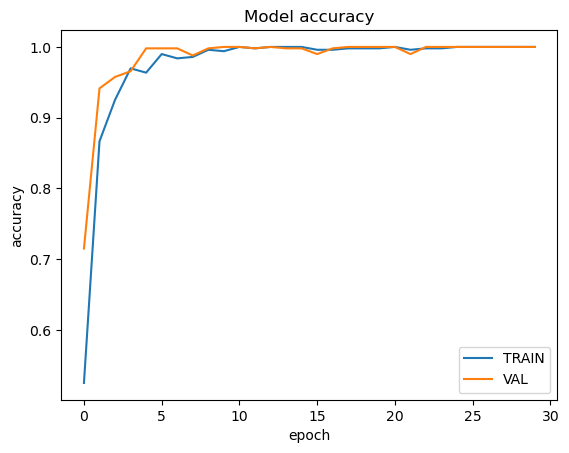

In [39]:
from matplotlib import pyplot as plt
# Visualize the training history to see whether you're overfitting.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

In [33]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools

16/16 [==============================] - 0s 4ms/step
Confusion matrix, without normalization

Classification Report:
               precision    recall  f1-score   support

       chair       1.00      1.00      1.00        84
       cobra       1.00      1.00      1.00       116
         dog       1.00      1.00      1.00        90
        tree       1.00      1.00      1.00        96
     warrior       1.00      1.00      1.00       109

    accuracy                           1.00       495
   macro avg       1.00      1.00      1.00       495
weighted avg       1.00      1.00      1.00       495



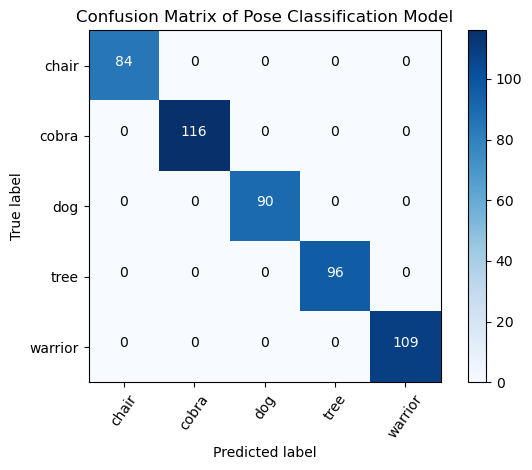

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """Plots the confusion matrix."""
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=55)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
              horizontalalignment="center",
              color="white" if cm[i, j] > thresh else "black")

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

# Classify pose in the TEST dataset using the trained model
y_pred = model.predict(x_test)

# Convert the prediction result to class name
y_pred_label = [class_names[i] for i in np.argmax(y_pred, axis=1)]
y_true_label = [class_names[i] for i in np.argmax(y_test, axis=1)]

# Plot the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
plot_confusion_matrix(cm,
                      class_names,
                      title ='Confusion Matrix of Pose Classification Model')

# Print the classification report
print('\nClassification Report:\n', classification_report(y_true_label,
                                                          y_pred_label))